  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1-10)^2 + (x_2+2)^2$. 

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Creating a function to evaluate f(x)

def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2
  return (x[0]-10)**2 + (x[1]+2)**2

# Creating a function to evaluate the gradient, g(x)and returna numpy array

def evalg(x):
  assert type(x) is np.ndarray and len(x)==2
  return np.array([2*(x[0]-10), 2*(x[1]+2)])

# creating a funtion find_minimiser to find the value of x that minimized the function f(x)

def find_minimizer(start_x, tol, step):
  assert type(start_x) is np.ndarray and len(start_x)==2
  assert tol>= 0 
  assert step>= 0

  x = start_x
  g_x = evalg(x)
  k =0

  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):
    x = np.subtract(x, np.multiply(step,g_x))
    k += 1
    g_x = evalg(x)

    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  return x, fvals





Optimal value of x1 and x2 :  [ 9.99956444 -1.99991289] 



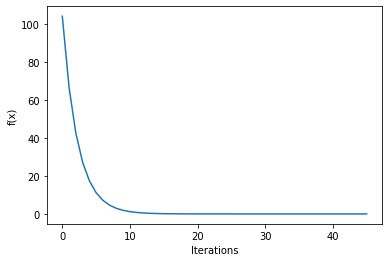

In [4]:
#Checking the code and plotting the results by initialising a value

my_start_x = np.array([0,0])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimal value of x1 and x2 : ', opt_x, '\n')


plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()


# Ex.1 - Part 2

***The value of the minimizer and the minimum value of the funtion f(x)***

In [5]:
print('The minimisers x1 and x2 are: ', opt_x )
print('The minimum value of the function f(x) : ', evalf(opt_x))


The minimisers x1 and x2 are:  [ 9.99956444 -1.99991289]
The minimum value of the function f(x) :  1.9730230936739685e-07


# EX.1 - Part 3

***For different values of the tolerance different iterations are performed and the minimizers and the optimal value of the function is recorded and the plot is also made.***

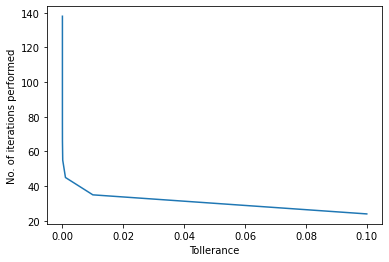

,Tolerance Value,Optimal_x1,Optimal_x2,Optimal_f(x),number_of_iterations
0,1.000000e-01,9.952776,-1.990555,2.319278e-03,24
1,1.000000e-02,9.995944,-1.999189,1.711325e-05,35
2,1.000000e-03,9.999564,-1.999913,1.973023e-07,45
3,1.000000e-04,9.999953,-1.999991,2.274741e-09,55
4,1.000000e-05,9.999996,-1.999999,1.678462e-11,66
5,1.000000e-06,10.000000,-2.000000,1.935135e-13,76
6,1.000000e-07,10.000000,-2.000000,2.231059e-15,86
7,1.000000e-08,10.000000,-2.000000,1.646232e-17,97
8,1.000000e-09,10.000000,-2.000000,1.897979e-19,107
9,1.000000e-10,10.000000,-2.000000,2.188135e-21,117


In [7]:
my_start_x = np.array([0,0])
my_steplength = 0.1

tol_arr = 10**(-np.linspace(1,12,12))

opt_x = []
opt_fx = []
iteration = []

for i in tol_arr:
  a,b = find_minimizer(my_start_x,i,my_steplength)
  opt_x.append(a)
  opt_fx.append(evalf(a))
  iteration.append(len(b)-1)


plt.plot(tol_arr,iteration)
plt.xlabel('Tollerance')
plt.ylabel('No. of iterations performed')
plt.show()
print('\n\n')
df = pd.DataFrame(np.array(opt_x), columns = ['Optimal_x1', 'Optimal_x2'])
df['Tolerance Value'] = tol_arr
df['Optimal_f(x)'] = opt_fx
df['number_of_iterations'] = iteration
df[['Tolerance Value', 'Optimal_x1', 'Optimal_x2', 'Optimal_f(x)', 'number_of_iterations']]


***Comment :*** *As we increase the value of the tollerance, the number of iterations decline. And this result was expected because the less is the value of the tolerance, the more algorith has to work to find the minimum of the function. Its like the accuracy level that we want, the more precise or we can say the more we move towards the real answer, the more number of iterations has to be perofored by the algorithm.*

*Also we observe that after the 5th iteration the optimal value has been reached and decreasing tolerance further does not give us any more advantage. Hence the optimal toleranc value for this is near 5th iteration.*

# EX.1 - Part 4

***For different values of the step length different iterations are performed and the minimizers and the optimal value of the function is recorded and the plot is also made.***

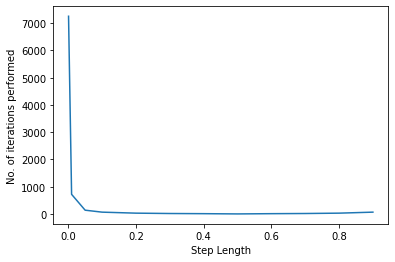

,Step_length,Optimal_x1,Optimal_x2,Optimal_f(x),number_of_iterations
0,0.001,9.999995,-1.999999,2.498674e-11,7257
1,0.010,9.999995,-1.999999,2.413139e-11,720
2,0.050,9.999995,-1.999999,2.443239e-11,138
3,0.100,9.999996,-1.999999,1.678462e-11,66
4,0.200,9.999996,-1.999999,1.411906e-11,29
5,0.300,9.999996,-1.999999,1.918461e-11,16
6,0.400,9.999999,-2.000000,1.090519e-12,10
7,0.500,10.000000,-2.000000,0.000000e+00,1
8,0.600,9.999999,-2.000000,1.090519e-12,10
9,0.700,9.999996,-1.999999,1.918461e-11,16


In [ ]:
my_start_x = np.array([0,0])
step_arr = np.array([0.001, 0.01, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
my_tol = 10**(-5)

opt_x = []
opt_fx = []
iteration = []

for i in step_arr:
  a,b = find_minimizer(my_start_x,my_tol,i)
  opt_x.append(a)
  opt_fx.append(evalf(a))
  iteration.append(len(b)-1)


plt.plot(step_arr,iteration)
plt.xlabel('Step Length')
plt.ylabel('No. of iterations performed')
plt.show()

print('\n\n')
df = pd.DataFrame(np.array(opt_x), columns = ['Optimal_x1', 'Optimal_x2'])
df['Step_length'] = step_arr
df['Optimal_f(x)'] = opt_fx
df['number_of_iterations'] = iteration
df[['Step_length', 'Optimal_x1', 'Optimal_x2', 'Optimal_f(x)', 'number_of_iterations']]

***Comment :*** *Just as in part 3 here we observe the similar relationship between the step length and the number of iterations that algorith take to find the optimak solution. As the step size increases the number of iterations decreases. Beacuse the step size is the tuning parameter that deceides the rate at which the solution moves towards the original value. It this rate is high then the algorith takes less number of iterations.*

*The algorith works fine and move towards the optimal solution as me increase the step length. But after a certain point, increasing step length make algorith to jump around the optimal value. This happens if we choose a large step size, then the algorith misses the optimal value and jumps over it. So in this example step value around 0.4 seems to work fine.*

# Ex.1 - Part 5

***For different values of the starting value of the x, with some given toleranc and the step size, optimal value of the function and the minimizers are provided with the plot. ***

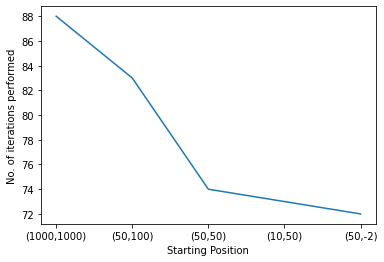

,Starting_x,Optimal_x1,Optimal_x2,Optimal_f(x),number_of_iterations
0,"(1000,1000)",10.000003,-1.999997,1.743420e-11,88
1,"(50,100)",10.000004,-1.999999,2.049994e-11,83
2,"(50,50)",10.000003,-1.999996,1.955196e-11,74
3,"(10,50)",10.000000,-1.999996,1.919309e-11,73
4,"(50,-2)",10.000004,-2.000000,1.774509e-11,72


In [ ]:
my_start_x = np.array([
                       [1000,1000],
                       [500,100],
                       [50,50],
                       [10,50],
                       [50,-2]
                      ])
step_length = 0.1
my_tol = 10**(-5)

opt_x = []
opt_fx = []
iteration = []

for i in range(len(my_start_x)):
  a,b = find_minimizer(my_start_x[i],my_tol,step_length)
  opt_x.append(a)
  opt_fx.append(evalf(a))
  iteration.append(len(b)-1)


plt.plot(['(1000,1000)', '(50,100)', '(50,50)', '(10,50)', '(50,-2)'],iteration)
plt.xlabel('Starting Position')
plt.ylabel('No. of iterations performed')
plt.show()

print('\n\n')
df = pd.DataFrame(np.array(opt_x), columns = ['Optimal_x1', 'Optimal_x2'])
df['Starting_x'] = ['(1000,1000)', '(50,100)', '(50,50)', '(10,50)', '(50,-2)']
df['Optimal_f(x)'] = opt_fx
df['number_of_iterations'] = iteration
df[['Starting_x', 'Optimal_x1', 'Optimal_x2', 'Optimal_f(x)', 'number_of_iterations']]

***Comment :*** *In this part we observe that the optimal value of the minimizer is (10, -2). So when we start our iterations from a value that is very far from the optimal point, like (1000,1000) , then it takes many iterations to reach the optimal solution. But when we start from a position like (50,-2) which is very near the optimal solutin, then we take very less iterations to reach the final answers.*

*REaching the optimal solution also depend on nthe learrning rate, if we increase the learning rate in this question from 0.1 to something larger, then we might reach our optimal solutin much faster.*